In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True)


In [81]:
housing=pd.read_csv('housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [82]:
housing[:5]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [83]:
housing.iloc[:5]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [84]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [85]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

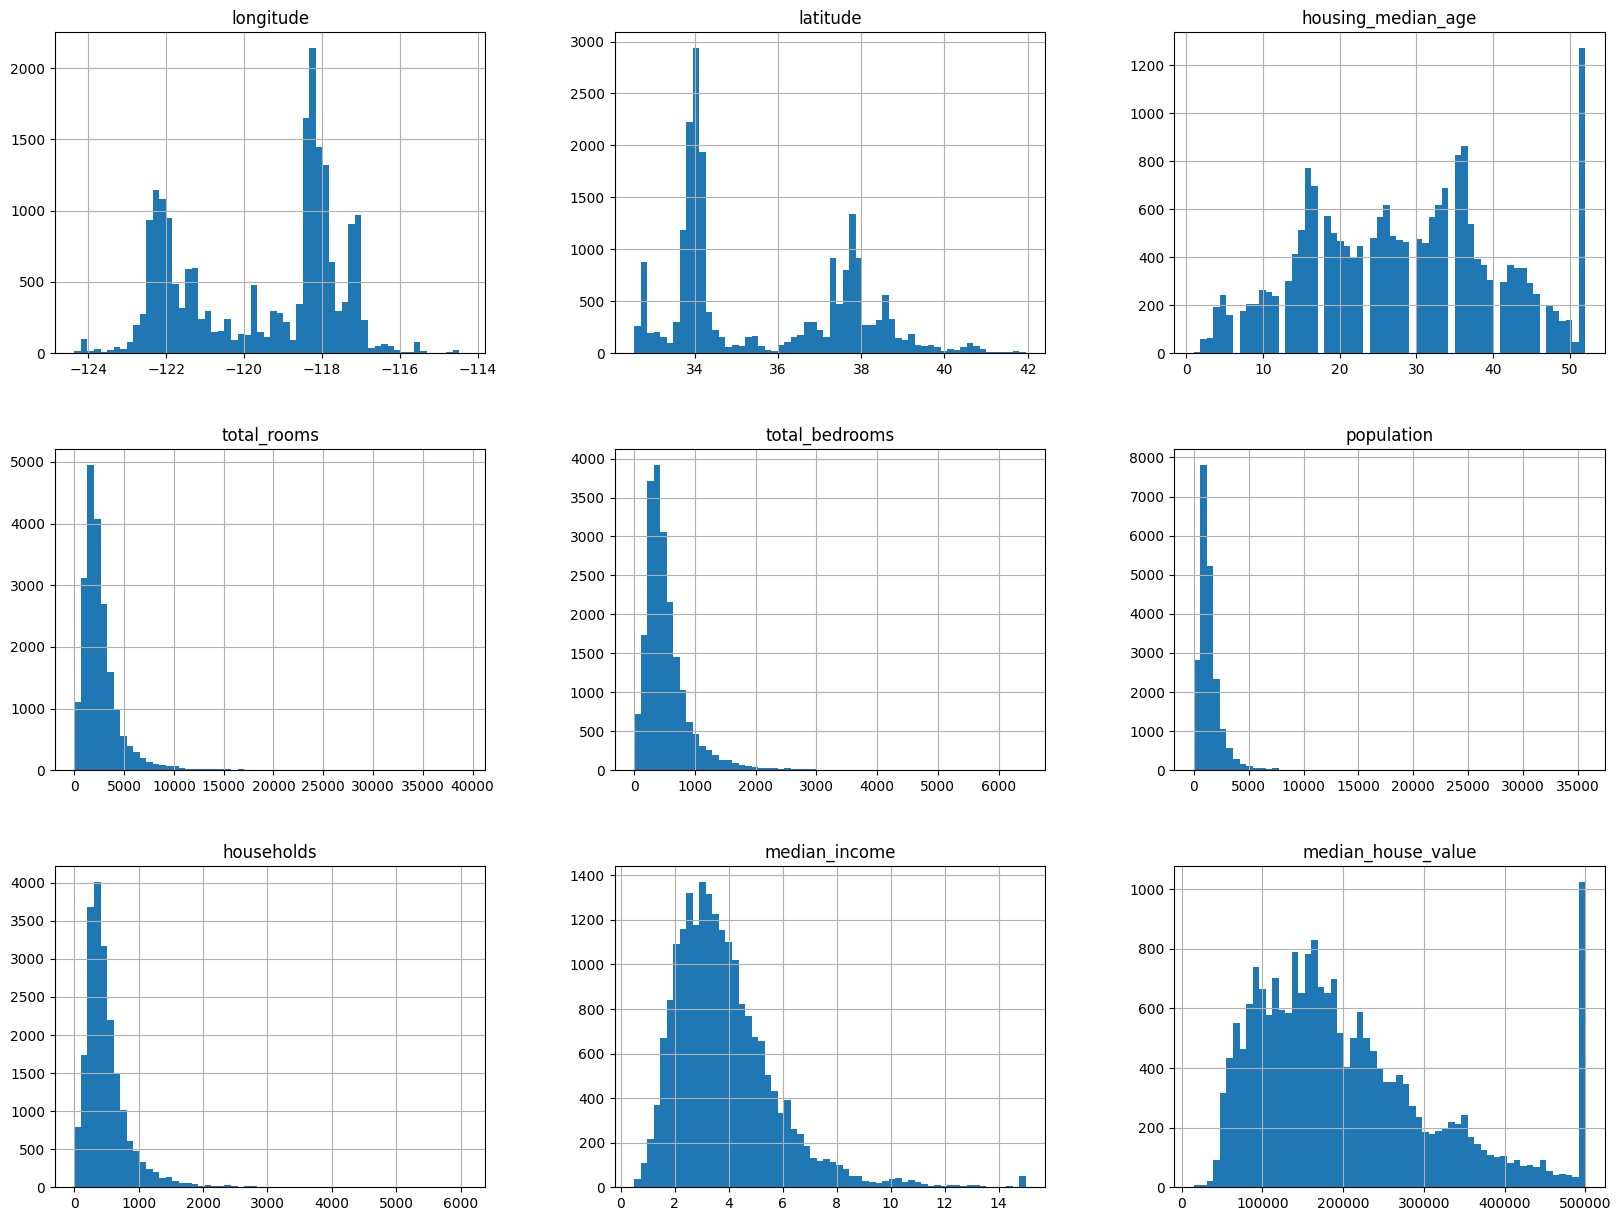

In [86]:
housing.hist(figsize=(20,15),bins=60)

<Axes: ylabel='Density'>

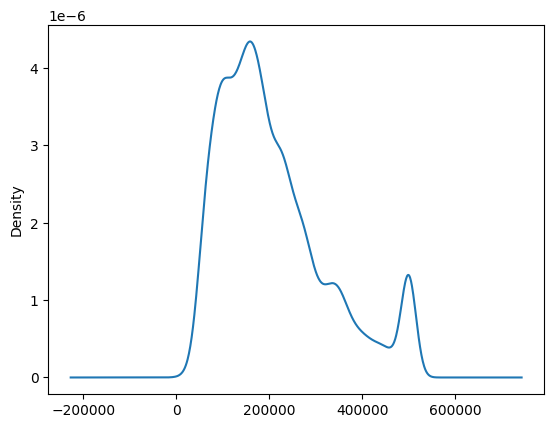

In [87]:
housing["median_house_value"].plot.kde()

In [88]:
# Method 1
# random Shuffling and Splitting
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)
train_set.shape,test_set.shape

((16512, 10), (4128, 10))

In [89]:
# Karl Pearson correlation coeff
corr_matrix=housing.iloc[:,:-1].corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688075
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
total_bedrooms,0.049686
population,-0.024650
longitude,-0.045967
latitude,-0.144160


In [90]:
housing['median_income'].min(),housing['median_income'].max()

(0.4999, 15.0001)

In [91]:
len(housing['median_income'].unique())

12928

In [92]:
housing["income_cat"]= np.ceil(housing['median_income']/1.5)
housing["income_cat"].value_counts().sort_index()

,count
income_cat,
1.0,822
2.0,6581
3.0,7236
4.0,3639
5.0,1423
6.0,532
7.0,189
8.0,105
9.0,50


In [93]:
housing["income_cat"].where(housing["income_cat"] < 5.0, 5.0,inplace=True)
housing["income_cat"].value_counts().sort_index()

,count
income_cat,
1.0,822
2.0,6581
3.0,7236
4.0,3639
5.0,2362


In [94]:
housing["income_cat"].value_counts().sort_index()/len(housing["income_cat"])

,count
income_cat,
1.0,0.039826
2.0,0.318847
3.0,0.350581
4.0,0.176308
5.0,0.114438


In [95]:
# Method 2
# Stratified Shuffled Split
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_set_index,test_set_index in split.split(housing,housing["income_cat"]):
    strat_train_set=housing.loc[train_set_index]
    strat_test_set=housing.loc[test_set_index]
strat_train_set.shape,strat_test_set.shape

((16512, 11), (4128, 11))

In [96]:
strat_train_set['income_cat'].value_counts().sort_index()/len(strat_train_set)

,count
income_cat,
1.0,0.039789
2.0,0.318859
3.0,0.350594
4.0,0.176296
5.0,0.114462


In [97]:
strat_test_set['income_cat'].value_counts().sort_index()/len(strat_test_set)

,count
income_cat,
1.0,0.039971
2.0,0.318798
3.0,0.350533
4.0,0.176357
5.0,0.114341


In [98]:
strat_train_set.drop('income_cat',axis=1,inplace=True)
strat_test_set.drop('income_cat',axis=1,inplace=True)

In [99]:
x_train_set=strat_train_set.drop('median_house_value',axis=1)
y_train_set=strat_train_set['median_house_value'].copy()

In [100]:
x_test_set=strat_test_set.drop('median_house_value',axis=1)
y_test_set=strat_test_set['median_house_value'].copy()

In [101]:
x_train_set.shape,y_train_set.shape,x_test_set.shape,y_test_set.shape

((16512, 9), (16512,), (4128, 9), (4128,))

# Data Preprocessing

In [102]:
x_train_numeric=x_train_set.drop('ocean_proximity',axis=1)
x_train_cat=x_train_set[['ocean_proximity']]

# Custom Transformation: DataFrame Selector

In [103]:
from sklearn.base import BaseEstimator,TransformerMixin
class DataFrameSelector(BaseEstimator,TransformerMixin):
  # Constructor
  def __init__(self,attribute_names):
    self.attribute_names=attribute_names
  # Fit Method
  def fit(self,X,y=None):
    return self
  # Transformer Method
  def transform(self,X):
    return X[self.attribute_names].values
dfs=DataFrameSelector(x_train_numeric.columns)
dfs.fit_transform(housing)[:5]

array([[-122.23  ,   37.88  ,   41.    ,  880.    ,  129.    ,  322.    ,
         126.    ,    8.3252],
       [-122.22  ,   37.86  ,   21.    , 7099.    , 1106.    , 2401.    ,
        1138.    ,    8.3014],
       [-122.24  ,   37.85  ,   52.    , 1467.    ,  190.    ,  496.    ,
         177.    ,    7.2574],
       [-122.25  ,   37.85  ,   52.    , 1274.    ,  235.    ,  558.    ,
         219.    ,    5.6431],
       [-122.25  ,   37.85  ,   52.    , 1627.    ,  280.    ,  565.    ,
         259.    ,    3.8462]])

# Data Pipeline

In [104]:
from sklearn.pipeline import Pipeline,FeatureUnion
x_train_numeric_pipeline=Pipeline([('Selector',DataFrameSelector(x_train_numeric.columns)),('Imputer',SimpleImputer(strategy='median')),('Scaler',StandardScaler())])
x_train_cat_pipeline=Pipeline([('Selector',DataFrameSelector(x_train_cat.columns)),('OneHotEncoder',OneHotEncoder(sparse_output=False))])
x_train_final=FeatureUnion(transformer_list=[('numeric_pipeline',x_train_numeric_pipeline),('cat_pipeline',x_train_cat_pipeline)])


In [105]:
x_train_prepared=x_train_final.fit_transform(x_train_set)
x_train_prepared[:5]

array([[-0.94135046,  1.34743822,  0.02756357,  0.58477745,  0.64037127,
         0.73260236,  0.55628602, -0.8936472 ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763,  1.26146668,  0.78156132,
         0.53361152,  0.72131799,  1.292168  ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, -0.46977281, -0.54513828,
        -0.67467519, -0.52440722, -0.52543365,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ],
       [ 1.22173797, -1.35147437, -0.37006852, -0.34865152, -0.03636724,
        -0.46761716, -0.03729672, -0.86592882,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ],
       [ 0.43743108, -0.63581817, -0.13148926,  0.42717947,  0.27279028,
         0.37406031,  0.22089846,  0.32575178,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ]])

In [106]:
x_test_prepared=x_train_final.transform(x_test_set)
x_test_prepared[:5]

array([[ 0.59229422, -0.71065803,  0.02756357,  1.78850799,  1.16374818,
         0.68509554,  1.23238474,  2.31286606,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [-0.42180959, -0.35049119, -0.37006852, -0.2817776 , -0.55244122,
        -0.50616043, -0.56965792,  0.59532358,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.56232071, -0.64985064,  0.5842485 , -0.54693503, -0.64251073,
        -0.54828912, -0.59095237,  0.26669272,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.7371662 , -0.80888535,  0.50472208, -0.45340507, -0.50862362,
        -0.31165136, -0.52174541, -0.31765075,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 1.25171148, -1.34211938,  0.74330133,  0.54081837,  0.19489232,
         0.06750685,  0.31139987,  0.25041867,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ]])

In [107]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x_train_prepared,y_train_set)

LinearRegression()

In [108]:
from sklearn.metrics import mean_squared_error
house_predictions=lin_reg.predict(x_test_prepared)
lin_mse=mean_squared_error(y_test_set,house_predictions)
lin_mse


4535602240.029962

In [109]:
lin_rmse=np.sqrt(lin_mse)
lin_rmse

np.float64(67346.87995764882)